In [1]:
import numpy as np
import scipy
import pandas as pd
import utils
from utils import QR_Factorization, EVD, SVD, Bidiagonal_fastMult,pic_deblur
import scipy.io
import scipy.linalg
from PIL import Image
from numpy import asarray
from matplotlib import image
from matplotlib import pyplot as plt
import time
import os
#from sklearn import preprocessing

%load_ext autoreload
%autoreload 2

In [20]:
#read the picture
def open_picture(name:str):
    path = './data/test_images/'+name 
    try:   
        im = Image.open(path+'.png')
    except:
        im = Image.open(path+'.jpg')      
    img = np.array(im)
    img = img.astype(np.float64) / 255
    print(img.shape)
    return img

In [11]:
def working_procee(name,blur_type,power,trunc,deblur_tpye):
    img_data = open_picture(name)
    blur_kernel,blur_data = pic_deblur.blur_picture(img_data,blur_type,power)
    begin = time.time()
    deblur_data,psnr,time_svd = pic_deblur.deblur_picture(blur_kernel,blur_data,trunc,deblur_tpye)
    time_used = time.time()-begin
    data = [img_data,blur_data,deblur_data]
    result_df = pd.DataFrame()
    result_df['time_used_for_deblurring'] = [time_used]
    result_df['average_psnr'] = [psnr]
    result_df['time_used_for_svd_l'] = [time_svd[0]]
    result_df['time_used_for_svd_r'] = [time_svd[1]]
    return data,blur_kernel,result_df

In [30]:
data,blur_kernel,result_df = working_procee('512_512_ducks',['tridiagonal','tridiagonal'],[66,66],150,['B1','B1'])

(512, 512, 3)
phaseI: 0.9052s
phaseII: 1.5367s
phaseI: 1.3108s
phaseII: 1.9990s


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


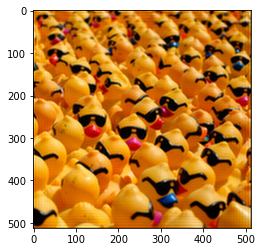

In [31]:
plt.imshow(data[2])

### draw the singular value

phaseI: 11.5863s
phaseII: 7.4945s
phaseI: 12.4195s


KeyboardInterrupt: 

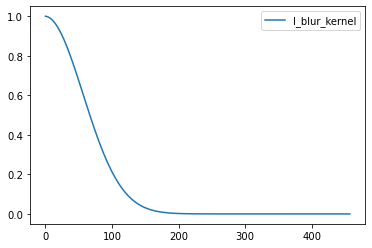

In [5]:
pic_deblur.singular_drawing(blur_kernel,['B1'])

phaseI: 0.9772s
phaseII: 0.9067s
phaseI: 1.1642s
phaseII: 0.8619s


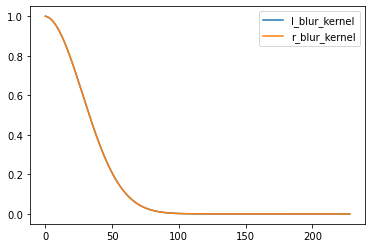

In [ ]:
pic_deblur.singular_drawing(blur_kernel,['A'])